In [1]:
# Imports

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [2]:
train_dataset = torchvision.datasets.FashionMNIST(
                    root='.',
                    train=True,
                    transform=transforms.ToTensor(), # This will automatically normalize data!
                    download=True
                    )

In [3]:
test_dataset = torchvision.datasets.FashionMNIST(
                    root='.',
                    train=False,
                    transform=transforms.ToTensor(), # This will automatically normalize data!
                    download=True
                    )

In [4]:
print(f'Shape of Train Data: {train_dataset.data.shape}')
print(f'Shape of Train Label: {train_dataset.targets.shape}')
print(f'Shape of Test Data: {test_dataset.data.shape}')
print(f'Shape of Test Label: {test_dataset.targets.shape}')

Shape of Train Data: torch.Size([60000, 28, 28])
Shape of Train Label: torch.Size([60000])
Shape of Test Data: torch.Size([10000, 28, 28])
Shape of Test Label: torch.Size([10000])


In [5]:
print(f'Type of Train Input Data: {train_dataset.data.type()}')

Type of Train Input Data: torch.ByteTensor


We don't need to normalize the data since the `ToTensor()` method will automatically normalize the data as soon as it is passed to the model

In [6]:
batch_size = 32 # The default in Keras
train_loader = torch.utils.data.DataLoader(
                        dataset=train_dataset,
                        batch_size=batch_size,
                        shuffle=False
                        )


test_loader = torch.utils.data.DataLoader(
                        dataset=test_dataset,
                        batch_size=batch_size,
                        shuffle=False # Not necessary!
                        )

## Split into train and validation set

There are two ways to do this  
1) Split the dataset itself  
2) Split the dataloader


In [7]:
# 1) Split the dataset itself
train_dataset_v1, val_dataset_v1 = torch.utils.data.random_split(train_dataset, (55000, 5000))

batch_size = 32 # The default in Keras

train_loader_v1 = torch.utils.data.DataLoader(
                        dataset=train_dataset_v1,
                        batch_size=batch_size,
                        shuffle=False
                        )
val_loader_v1 = torch.utils.data.DataLoader(
                        dataset=val_dataset_v1,
                        batch_size=batch_size,
                        shuffle=False
                        )


test_loader = torch.utils.data.DataLoader(
                        dataset=test_dataset,
                        batch_size=batch_size,
                        shuffle=False # Not necessary!
                        )


In [8]:
# 2) Split the dataloader
batch_size = 32 # The default in Keras
dataset_size=len(train_dataset)
indices=list(range(dataset_size))

# indices=np.arange(0,60000)
train_loader_v2 = torch.utils.data.DataLoader(
                        dataset=train_dataset,
                        batch_size=batch_size,
                        shuffle=False,
                        sampler=torch.utils.data.SubsetRandomSampler(indices[:55000])
                        )

val_loader_v2 = torch.utils.data.DataLoader(
                        dataset=train_dataset,
                        batch_size=batch_size,
                        shuffle=False,
                        sampler=torch.utils.data.SubsetRandomSampler(indices[-5000:])
                        )

test_loader = torch.utils.data.DataLoader(
                        dataset=test_dataset,
                        batch_size=batch_size,
                        shuffle=False # Not necessary!
                        )

print(train_loader_v2.dataset.data.shape)
print(val_loader_v2.dataset.data.shape)
print(test_loader.dataset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [9]:
model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100,10)
            )

In [10]:
from torchsummary import summary
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 300]         235,500
              ReLU-3                  [-1, 300]               0
            Linear-4                  [-1, 100]          30,100
              ReLU-5                  [-1, 100]               0
            Linear-6                   [-1, 10]           1,010
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.02
Estimated Total Size (MB): 1.03
----------------------------------------------------------------


Unfortunately, using this method, we cannot access the layer's weights and bias

In [12]:
model.layer[0].weight

ModuleAttributeError: 'Sequential' object has no attribute 'layer'

In [14]:
class Modela(nn.Module):
    def __init__(self):
        super(Modela, self).__init__()
        self.layer = nn.Sequential(
                                # For grayscale images, in_channels = 1; for colour, it is 3!
                                nn.Flatten(),
                                nn.Linear(784, 300),
                                nn.ReLU(),
                                nn.Linear(300, 100),
                                nn.ReLU(),
                                nn.Linear(100,10)
                                )
            
    def forward(self, X):
        out = self.layer(X)
        return out

OR

In [15]:
class Modelb(nn.Module):
    def __init__(self):
        super(Modelb, self).__init__()
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(784, 300)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(300, 100)
        self.linear3 = nn.Linear(100, 10)
            
    def forward(self, X):
        out = self.flat(X)
        out = self.linear1(out)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        return out

In [16]:
model1 = Modela()

from torchsummary import summary
summary(model1, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 300]         235,500
              ReLU-3                  [-1, 300]               0
            Linear-4                  [-1, 100]          30,100
              ReLU-5                  [-1, 100]               0
            Linear-6                   [-1, 10]           1,010
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.02
Estimated Total Size (MB): 1.03
----------------------------------------------------------------


In [17]:
print(model1.layer[1].weight.shape)
print(model1.layer[1].bias.shape)

torch.Size([300, 784])
torch.Size([300])


In [18]:
model1.layer[1].weight

Parameter containing:
tensor([[-0.0114, -0.0032,  0.0170,  ..., -0.0348, -0.0251,  0.0258],
        [-0.0302,  0.0233,  0.0135,  ..., -0.0039,  0.0196, -0.0091],
        [-0.0026,  0.0196,  0.0199,  ..., -0.0265,  0.0240,  0.0109],
        ...,
        [ 0.0176, -0.0115, -0.0148,  ...,  0.0181, -0.0135, -0.0226],
        [-0.0157,  0.0355,  0.0124,  ...,  0.0221,  0.0351, -0.0169],
        [ 0.0128,  0.0063,  0.0236,  ...,  0.0173,  0.0133,  0.0168]],
       requires_grad=True)

In [19]:
model1.layer[1].bias

Parameter containing:
tensor([ 9.7202e-03, -1.2357e-02, -1.4437e-02,  3.3996e-02, -4.8208e-04,
        -2.1506e-02, -9.0128e-03, -3.3790e-03,  1.6382e-02, -5.2966e-03,
        -2.3079e-02,  3.1490e-02, -6.8265e-03,  1.6686e-02,  2.9419e-02,
        -2.9893e-02,  2.7294e-02, -2.6874e-02, -2.7462e-03,  1.1533e-02,
        -1.3755e-02, -2.5753e-02, -2.6193e-02,  6.8437e-03,  2.2896e-02,
        -9.5841e-03, -1.7592e-02,  5.5437e-03,  9.7921e-03, -8.4521e-03,
        -1.3732e-02,  1.3821e-02,  2.9890e-02,  3.0025e-02, -1.5604e-02,
         2.0652e-02, -9.9194e-03, -8.7472e-03,  5.7998e-03,  2.9629e-03,
        -1.3041e-02, -3.3428e-02, -3.2290e-02, -1.9206e-02, -1.0346e-02,
         7.5544e-03, -1.0068e-02, -1.3234e-03, -3.0060e-02,  2.3824e-02,
        -6.5415e-03,  1.3646e-02, -2.6792e-02,  1.8160e-02,  2.6059e-02,
        -1.3200e-02, -2.5695e-02, -3.1820e-02,  3.0526e-02,  7.6206e-03,
         1.6766e-02,  5.1768e-03,  2.1020e-02, -1.9832e-02, -4.6991e-03,
        -3.1567e-02,  3.3385e

In [20]:
model2 = Modelb()

from torchsummary import summary
summary(model1, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 300]         235,500
              ReLU-3                  [-1, 300]               0
            Linear-4                  [-1, 100]          30,100
              ReLU-5                  [-1, 100]               0
            Linear-6                   [-1, 10]           1,010
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.02
Estimated Total Size (MB): 1.03
----------------------------------------------------------------


In [21]:
print(model2.linear1.weight.shape)
print(model2.linear1.bias.shape)

torch.Size([300, 784])
torch.Size([300])


In [22]:
list(model2.parameters())

[Parameter containing:
 tensor([[-0.0313,  0.0123,  0.0159,  ..., -0.0071, -0.0245, -0.0101],
         [ 0.0301,  0.0014,  0.0292,  ...,  0.0282,  0.0125, -0.0147],
         [ 0.0005,  0.0305, -0.0268,  ...,  0.0220, -0.0050, -0.0012],
         ...,
         [ 0.0049, -0.0071,  0.0039,  ...,  0.0311, -0.0117,  0.0036],
         [ 0.0031, -0.0101, -0.0045,  ..., -0.0268, -0.0131, -0.0092],
         [-0.0024, -0.0286, -0.0126,  ...,  0.0104,  0.0055,  0.0219]],
        requires_grad=True),
 Parameter containing:
 tensor([-1.9992e-02,  3.1153e-02, -2.0873e-02, -6.2283e-03,  2.5546e-02,
          4.7429e-03,  1.4377e-02, -8.4490e-03, -3.1048e-02,  1.4150e-02,
          3.0882e-02,  2.8681e-02, -2.2217e-02,  8.2350e-03, -2.7032e-02,
         -3.0618e-03, -3.0628e-02, -1.8906e-03, -9.3300e-03, -1.3279e-03,
         -3.1480e-02, -1.6365e-02,  6.2971e-03,  1.5900e-02,  4.1211e-03,
         -1.6172e-02, -1.4654e-02,  1.3978e-02, -2.7838e-02,  4.8752e-03,
          2.5694e-02,  1.4876e-03, -1.07

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)

In [24]:
class PyTorchTrainer(object):
    def __init__(self,
                model,
                optim,
                loss_fn,
                device="cpu"):
        self.model = model
        self.optim = optim
        self.loss_fn = loss_fn
        self.device = device
        
    def fit(self,
            train_loader,
            test_loader,
            n_epochs: int=100,
            eval_inter: int=1):
        history = {}
        history['epoch'] = []
        history['training_acc'] = []
        history['test_acc'] = []
        history['training_loss'] = []
        history['test_loss'] = []
        # Training Loop

        history['p_test'] = []
        p_test = np.array([]) # for listing all predictions - last epoch only

        for epoch in range(n_epochs):
            history['epoch'].append(epoch+1)
            
            self.model.train()
            
            train_loss = []
            n_correct = 0.
            n_total = 0.
            for inputs, targets in tqdm(train_loader, leave=False):
                # Move data to GPU
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                # zero the gradient
                self.optim.zero_grad()

                # forward pass
                outputs = self.model(inputs)
                loss = self.loss_fn(outputs, targets)

                # get prediction
                _, predictions = torch.max(outputs, 1)

                # update counts
                n_correct += (predictions == targets).sum().item()
                n_total += targets.shape[0]

                # backward pass and optimize
                loss.backward()
                self.optim.step()

                train_loss.append(loss.item())

            train_loss = np.mean(train_loss)
            history['training_acc'].append(n_correct / n_total * 100) 
            # save losses
            history['training_loss'].append(train_loss) 
    
           
            self.model.eval()
            with torch.no_grad():
                test_loss = []
                n_correct = 0.
                n_total = 0.
                for inputs, targets in test_loader:
                    # Move data to GPU
                    inputs, targets = inputs.to(self.device), targets.to(self.device)

                    # forward pass
                    outputs_test = self.model(inputs)
                    loss_test = self.loss_fn(outputs_test, targets)

                    # get prediction
                    _, predictions = torch.max(outputs_test, 1)

                    # update list of predictions  - done for last epoch only!
                    if epoch == (n_epochs - 1):
                        p_test = np.concatenate((p_test, predictions.cpu().numpy()))

                    # update counts
                    n_correct += (predictions == targets).sum().item()
                    n_total += targets.shape[0]

                    test_loss.append(loss_test.item())
            history['p_test'] = p_test
            test_loss = np.mean(test_loss)
            history['test_acc'].append(n_correct / n_total * 100) 
            # save losses
            history['test_loss'].append(test_loss) 
            
            if (epoch +1) % eval_inter == 0:
                print(f"Epoch: {epoch+1}/{n_epochs}, Train Accuracy: {history['training_acc'][-1]:.2f}%, Test Accuracy: {history['test_acc'][-1]:.2f}%, Train Loss: {history['training_loss'][-1]:.4f}, Test Loss: {history['test_loss'][-1]:.4f}", end='')
        return history

In [25]:
# If GPU...
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model1.to(device)

cpu


Modela(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [26]:
trainer = PyTorchTrainer(model1, optimizer, loss_fn,device)

In [27]:
history={}

In [28]:
history = trainer.fit(train_loader_v2,test_loader,30,1)

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 1/30, Train Accuracy: 64.69%, Test Accuracy: 75.88%, Train Loss: 1.0956, Test Loss: 0.6821

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 2/30, Train Accuracy: 79.27%, Test Accuracy: 80.33%, Train Loss: 0.5949, Test Loss: 0.5569

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 3/30, Train Accuracy: 82.12%, Test Accuracy: 81.55%, Train Loss: 0.5120, Test Loss: 0.5236

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 4/30, Train Accuracy: 83.43%, Test Accuracy: 82.55%, Train Loss: 0.4747, Test Loss: 0.4864

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 5/30, Train Accuracy: 84.26%, Test Accuracy: 83.51%, Train Loss: 0.4497, Test Loss: 0.4683

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 6/30, Train Accuracy: 85.03%, Test Accuracy: 84.14%, Train Loss: 0.4297, Test Loss: 0.4466

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 7/30, Train Accuracy: 85.49%, Test Accuracy: 84.30%, Train Loss: 0.4147, Test Loss: 0.4362

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 8/30, Train Accuracy: 86.05%, Test Accuracy: 84.78%, Train Loss: 0.3999, Test Loss: 0.4257

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 9/30, Train Accuracy: 86.33%, Test Accuracy: 84.62%, Train Loss: 0.3871, Test Loss: 0.4325

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 10/30, Train Accuracy: 86.78%, Test Accuracy: 85.22%, Train Loss: 0.3773, Test Loss: 0.4143

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 11/30, Train Accuracy: 86.97%, Test Accuracy: 85.68%, Train Loss: 0.3664, Test Loss: 0.4043

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 12/30, Train Accuracy: 87.19%, Test Accuracy: 85.62%, Train Loss: 0.3587, Test Loss: 0.3994

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 13/30, Train Accuracy: 87.64%, Test Accuracy: 85.46%, Train Loss: 0.3487, Test Loss: 0.4039

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 14/30, Train Accuracy: 87.80%, Test Accuracy: 85.43%, Train Loss: 0.3413, Test Loss: 0.4096

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 15/30, Train Accuracy: 88.14%, Test Accuracy: 86.48%, Train Loss: 0.3346, Test Loss: 0.3777

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 16/30, Train Accuracy: 88.33%, Test Accuracy: 85.98%, Train Loss: 0.3275, Test Loss: 0.3855

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 17/30, Train Accuracy: 88.45%, Test Accuracy: 86.02%, Train Loss: 0.3209, Test Loss: 0.3930

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 18/30, Train Accuracy: 88.77%, Test Accuracy: 86.39%, Train Loss: 0.3147, Test Loss: 0.3793

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 19/30, Train Accuracy: 88.80%, Test Accuracy: 87.23%, Train Loss: 0.3096, Test Loss: 0.3588

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 20/30, Train Accuracy: 89.05%, Test Accuracy: 87.40%, Train Loss: 0.3042, Test Loss: 0.3562

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 21/30, Train Accuracy: 89.36%, Test Accuracy: 87.32%, Train Loss: 0.2976, Test Loss: 0.3542

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 22/30, Train Accuracy: 89.37%, Test Accuracy: 86.25%, Train Loss: 0.2925, Test Loss: 0.3728

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 23/30, Train Accuracy: 89.51%, Test Accuracy: 86.36%, Train Loss: 0.2887, Test Loss: 0.3771

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 24/30, Train Accuracy: 89.78%, Test Accuracy: 87.31%, Train Loss: 0.2838, Test Loss: 0.3535

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 25/30, Train Accuracy: 89.92%, Test Accuracy: 87.45%, Train Loss: 0.2792, Test Loss: 0.3430

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 26/30, Train Accuracy: 90.07%, Test Accuracy: 86.20%, Train Loss: 0.2749, Test Loss: 0.3872

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 27/30, Train Accuracy: 90.28%, Test Accuracy: 87.28%, Train Loss: 0.2701, Test Loss: 0.3554

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 28/30, Train Accuracy: 90.35%, Test Accuracy: 87.76%, Train Loss: 0.2668, Test Loss: 0.3434

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 29/30, Train Accuracy: 90.49%, Test Accuracy: 88.07%, Train Loss: 0.2626, Test Loss: 0.3322

  0%|          | 0/1719 [00:00<?, ?it/s]

Epoch: 30/30, Train Accuracy: 90.63%, Test Accuracy: 87.37%, Train Loss: 0.2582, Test Loss: 0.3493

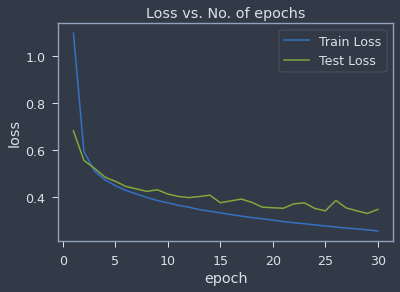

In [29]:
plt.plot(history['epoch'], history['training_loss'], label="Train Loss")
plt.plot(history['epoch'], history['test_loss'], '-x', label="Test Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss vs. No. of epochs');

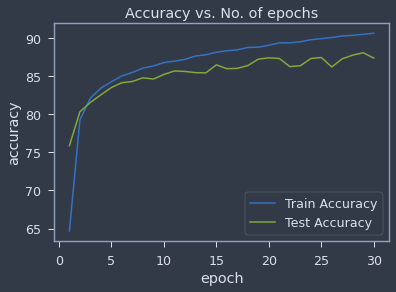

In [30]:
plt.plot(history['epoch'], history['training_acc'], label="Train Accuracy")
plt.plot(history['epoch'], history['test_acc'], '-x', label="Test Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy vs. No. of epochs');